In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
def random_float():
    x = random.uniform(-1,1)
    return x

def make_line():
    point1 = []
    point2 = []
    
    point1.append(random_float())
    point1.append(random_float())
    point2.append(random_float())
    point2.append(random_float())
    
    slope = (point1[1] - point2[1]) / (point1[0] - point2[0])
    y_int = slope * -1 * point1[0] + point1[1]
    
    return [slope, y_int]

In [3]:
def graph(slope, y_int):  

    formula = str(slope)
    formula += ' * x '
    if y_int < 0:
        formula += '- ' 
    else:
        formula += '+ '
    formula += str(abs(y_int))

    x = np.array([-1, 0, 1])
    y = eval(formula)
    
    return plt.plot(x, y)  


In [4]:
def generate_points(N):
    lst_points = []
    for i in range(N):
        point = []
        point.append(1)
        point.append(random_float())
        point.append(random_float())
        lst_points.append(point)
    return lst_points



def init_points(N, line):
    lst_points = generate_points(N)
    for point in lst_points:
        x_val = point[1]
        y_val = point[2]
        line_y = line[0] * x_val + line[1]
        if line_y > y_val:
            point.append(-1)
        else:
            point.append(1)
    return lst_points



In [7]:
# maybe update for n dimensions rather than only 2
def update_weight(weight, point):
    new_weight = []
    for i in range(3):
        new_weight.append(weight[i] + (point[3] * point[i]))
    return new_weight

In [92]:
def plot_points(points, plot):
    positive_x, positive_y = [], []
    negative_x, negative_y = [], []
    for point in points:
        if point[3] <= 0:
            negative_x.append(point[1])
            negative_y.append(point[2])
        else:
            positive_x.append(point[1])
            positive_y.append(point[2])
    plt.scatter(positive_x, positive_y, s = 40, marker = '+', color = 'g', )
    plt.scatter(negative_x, negative_y, s = 40, marker = 'x', color = 'r')
    return plot

[0.49605283087551144, -0.4338163856211388]
5
[1, -1.6480319548526219, 1.0228160259436923]
(1.6112691950950608, -0.9776929326829414)


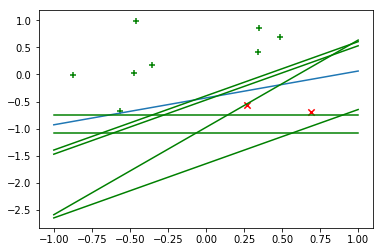

In [128]:
n = 10

weight_vector = [0,0,0]
misclass_points = []
iterations = 0

target_line = make_line()
print (target_line)
lst_points = init_points(n, target_line)
g = graph(target_line[0], target_line[1])
plot_points(lst_points, g)

# program works above this line. Target line is produced and points are initialized as yes or no.

for point in lst_points:
    misclass_points.append(point)

while misclass_points != []:
    point = random.choice(misclass_points)
    weight_vector = update_weight(weight_vector, point)
    iterations += 1
    misclass_points = []
    graph_weight_inter(weight_vector[0], weight_vector[1])


    for point in lst_points:
        if (np.sign((weight_vector[0] * point[0]) + (weight_vector[1] * 
                point[1]) + (weight_vector[2] * point[2])) != point[3]):
            misclass_points.append(point)

counter  = 0
print (iterations)
print (weight_vector)
line = get_line_from_weight(weight_vector)
print (line)
graph_weight(line[0], line[1])


In [112]:
def get_line_from_weight(weight):
    slope = -1 * weight[1] / weight[2]
    y_int = -1 * weight[0] / weight[2]
    return slope, y_int

In [119]:
def graph_weight(slope, y_int):  

    formula = str(slope)
    formula += ' * x '
    if y_int < 0:
        formula += '- ' 
    else:
        formula += '+ '
    formula += str(abs(y_int))

    x = np.array([-1, 0, 1])
    y = eval(formula)
    
    plt.plot(x, y, color = 'g')  
    plt.show()



In [124]:
def graph_weight_inter(slope, y_int):  
    formula = str(slope)
    formula += ' * x '
    if y_int < 0:
        formula += '- ' 
    else:
        formula += '+ '
    formula += str(abs(y_int))

    x = np.array([-1, 0, 1])
    y = eval(formula)
    
    return plt.plot(x, y, color = 'g')  
    

